# Entropy

## Definition of statistical entropy

The entropy $S$ of an isolated system at thermodynamic equilibrium is the natural logarithm of W, the number of distinct microscopic states available to the system given the macroscopic constraints such as a fixed total energy E.

$$S=k \log W$$

- S: entropy
- W: number of possbile arrangements
- k: Boltzmann constant used to allow expression in terms of energy. Set to 1 below.

The Boltzmann equation relates the microscopic details of the system via W to its macroscopic state via the entropy S. Named after Ludwig Boltzmann who related probability to entropy in 1877, but $k$ was defined by Max Planck around 1900.

$$
\Delta S=\int \frac{\mathrm{d} Q}{T}
$$

- The Boltzmann constant ($k_{B}$ or $k$) relates the statistical entropy to the classical macroscopic entropy. 
- It relates average relative kinetic energy of particles with the thermodynamic temperature of the system: $$1.380649×10^{−23} J⋅K^{−1}$$ 
- It has the same units as the classical entropy.

### Measurement of the classical entropy of a system

In [13]:
from IPython.display import Image
Image(url="./SectionD10/images/MacroscopicEntropy.png", width=900, height=900)

In [8]:
from IPython.display import Image
Image(url="./SectionD10/images/StatisticalEntropy.png", width=900, height=900)

In [6]:
from IPython.display import Image
Image(url="./SectionD10/images/entropy.png", width=900, height=900)

### Entropy quantifies the possible arrangement of objects

- molecules
- characters in text
- pixels
- bubbles in sourdough bread
- books in a bookcase

## Rescaled, dimensionless Entropy == Information Entropy

Set $k=1$:
$$
S^{\prime}=\ln W, \quad \Delta S^{\prime}=\int \frac{\mathrm{d} Q}{k T}
$$

$$S' = H(p)=-\mathbb{E}[\log p]=-\sum_i^n p_i \log p_i$$

For a proability distribution p with n possible distinct outcomes, each event $i$ has a probability of $p_{i}$.

### Multiplicity, W


$$
W=\frac{N !}{n_{1} ! n_{2} ! \cdots n_{t} !}
$$


- $N:$ total number of events
- $n_{i}$: number of times distinct event $i$ occurs
- $t$: number of distinct events



With large $N$, we can apply Stirling's approximation:
$$x ! \approx\left(\frac{x}{e}\right)^x$$


Because $p_i=\frac{n_i}{N}$, we can rewrite the above as

$$
W=\frac{1}{p_1^{n_1} p_2^{n_2} \cdots p_t^{n_t}}
$$

Take the logarithm (????), 

$$
\log W=-\sum_i^n p_i \log p_i
$$

In [32]:
import sys
print(sys.version)

3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:27:35) [Clang 14.0.6 ]


In [15]:
# Basic
import numpy as np
from scipy import stats
import pandas as pd
from patsy import bs, dmatrix
import matplotlib.pyplot as plt

# Exploratory Analysis of Bayesian Models
import arviz as az

# Probabilistic programming languages
import bambi as bmb
import pymc as pm
import tensorflow_probability as tfp

tfd =tfp.distributions

# Computational Backend
import theano
import theano.tensor as tt
import tensorflow as tf

/Users/blaine/opt/anaconda3/envs/stat-rethink2-pymc_v4/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-12-24 06:04:54.801900: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


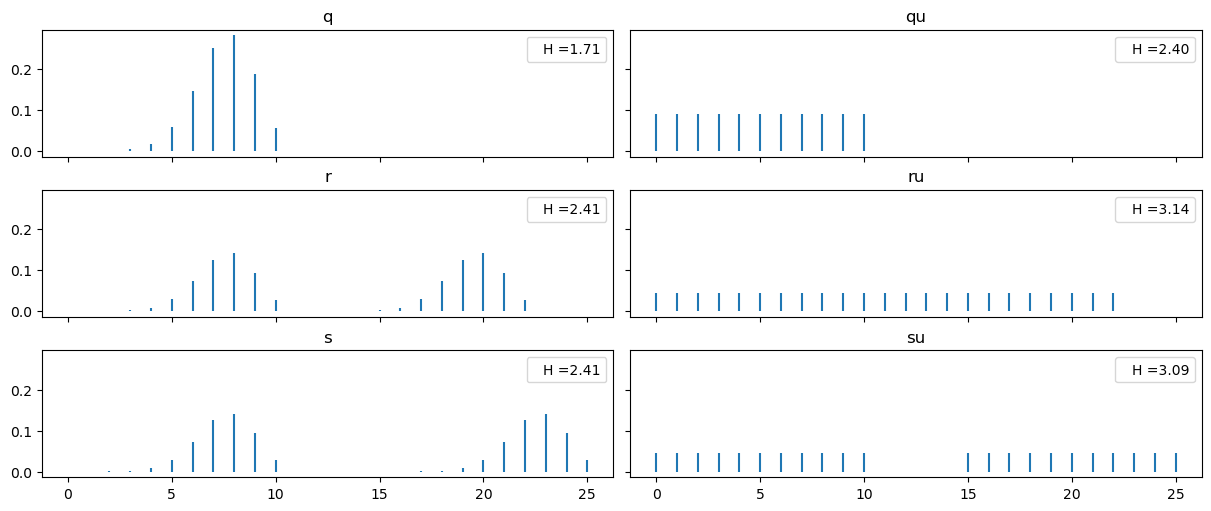

In [16]:
x = range(0, 26)
q_pmf =stats.binom(10,0.75).pmf(x)
qu_pmf =stats.randint(0,np.max(np.nonzero(q_pmf))+1).pmf(x)
r_pmf =(q_pmf+np.roll(q_pmf,12))/2
ru_pmf =stats.randint(0,np.max(np.nonzero(r_pmf))+1).pmf(x)
s_pmf =(q_pmf+np.roll(q_pmf,15))/2
su_pmf =(qu_pmf+np.roll(qu_pmf,15))/2

_, ax=plt.subplots(3,2,figsize=(12,5),sharex=True,sharey=True,
      constrained_layout=True)
ax = np.ravel(ax)

zipped = zip([q_pmf, qu_pmf,r_pmf,ru_pmf,s_pmf,su_pmf],
         ["q", "qu", "r", "ru", "s", "su"])

for idx, (dist,label) in enumerate(zipped):
    ax[idx].vlines(x, 0,dist,label=f"H ={stats.entropy(dist):.2f}")
    ax[idx].set_title(label)
    ax[idx].legend(loc=1, handlelength=0)

26 possible events.

- q: $q \sim \operatorname{binom}(n=10, p=0.75)$ (has 11 events and  the lowest entropy)
- qu: uniform distribution with 11 events (Need to increase n 3 times for $q$ to get a higher entropy than qu).
    
- r: generated by duplicating $q$ and shifting to the right and then normalizing as the probabilities sum to 1.
- ru: uniform distribution with 23 events.

- s: like $r$ but with a larger valley
- su: uniform distribution with 22 events. H of su is less than H of ru.

In [54]:
q_pmf =stats.binom(30,0.75).pmf(x)
q_pmf

array([8.67361738e-19, 7.80625564e-17, 3.39572120e-15, 9.50801937e-14,
       1.92537392e-12, 3.00358332e-11, 3.75447915e-10, 3.86174998e-09,
       3.33075936e-08, 2.44255686e-07, 1.53881082e-06, 8.39351359e-06,
       3.98691895e-05, 1.65610480e-04, 6.03295319e-04, 1.93054502e-03,
       5.42965787e-03, 1.34144488e-02, 2.90646392e-02, 5.50698426e-02,
       9.08652404e-02, 1.29807486e-01, 1.59309188e-01, 1.66235674e-01,
       1.45456215e-01, 1.04728475e-01])

In [55]:
H = stats.entropy(q_pmf)
H

2.0671606564787637

# Kullback-Leibler Divergence

- When we do not know distribution $p$ or when $p$ is complex, we may want to approximate it with distribution $q$.
- How much information do we lose by using $q$ to represent $p$?
- This is equivalent to how much extra uncertainty do we introduce when using $q$ to represent $p$.
- KL divergence gives us 0 when $p=q$ and positive values otherwise.
- KL divergence is the average value of the difference of $\textrm{log} p$ and $\textrm{log} q$.

Events appear according to $p$ so compute the expectation (mean value) with respect to $p$.

$$
\mathbb{K} \mathbb{L}(p \| q)=\mathbb{E}_p[\log p-\log q]
$$

For a discrete distribution, the above equation can be expressed as follows:

$$\mathbb{K} \mathbb{L}(p \| q)=\sum_i^n p_i\left(\log p_i-\log q_i\right)$$

Using the properties of logarithms, rewrite in this common representation of $\mathbb{K} \mathbb{L}(p \| q)$

$$\mathbb{K} \mathbb{L}(p \| q)=\sum_i^n p_i \log \frac{p_i}{q_i}$$

## Relate the KL divergence, $D_{\mathrm{KL}}(p \| q)$,  to information entropy, $H(p, q)$

Using the properties of logarithms, rearrange and then expand. Note the negative sign.

$$
\mathbb{K} \mathbb{L}(p \| q)=-\sum_i^n p_i\left(\log q_i-\log p_i\right)
$$

$$
\mathbb{K} \mathbb{L}(p \| q)=-\overbrace{\sum_i^n p_i \log q_i}^{H(p, q)}-\overbrace{\left(-\sum_i^n p_i \log p_i\right)}^{H(p)}
$$

Note that $H(p, q)$ is the entropy of q evaluated at the values of p. It is the *cross entropy*.

$$
H(p, q)=-\mathbb{E}_p[\log q]
$$

Note that when $p=q$

$$\mathbb{K} \mathbb{L}(p \| q)=\mathbb{K} \mathbb{L}(p \| p)=\sum_i p_i\left(\log \left(p_i\right)-\log \left(p_i\right)\right)=0$$

Now replace $\mathbb{K} \mathbb{L}(p \| q)$ with $D_{\mathrm{KL}}(p \| q)$ and rearrange. 

$$
H(p, q)=H(p)+D_{\mathrm{KL}}(p \| q)
$$

So the KL divergence can be interpreted as the extra entropy when using $q$ to represent $p$.

##  Compute $D_{\mathrm{KL}}(p \| q)$

- using all pairwise combinations.
- white represents infinite values  $D_{\mathrm{KL}}(p \| q) = \infty$
- black represents  $D_{\mathrm{KL}}(p \| q) = 0$
- Note that the plot is not symmetric because usually $D_{\mathrm{KL}}(p \| q) \neq D_{\mathrm{KL}}(q \| p)$ 

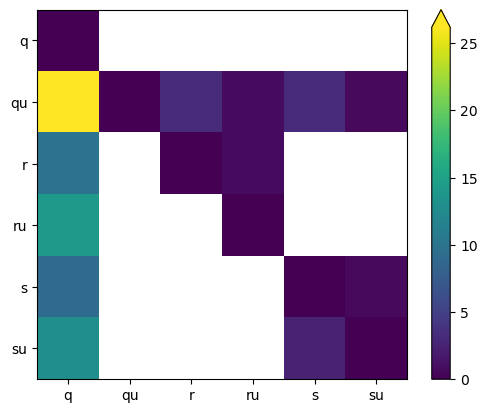

In [46]:
dists = [q_pmf, qu_pmf, r_pmf, ru_pmf, s_pmf, su_pmf]
names = ["q", "qu", "r", "ru", "s", "su"]

fig, ax = plt.subplots()
KL_matrix = np.zeros((6, 6))
for i, dist_i in enumerate(dists):
    for j, dist_j in enumerate(dists):
        KL_matrix[i, j] = stats.entropy(dist_i, dist_j)

ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.set_cmap("viridis")
cmap = plt.cm.get_cmap()
cmap.set_bad('w', 0.3)
im = ax.imshow(KL_matrix)
fig.colorbar(im, extend="max");

plt.savefig("./SectionD10/images/chp11_KL_heatmap.png")

- The above is the KL divergence for all pairwise combinations of the distributions q, qu,r,ru,s,and su.

- The dark blue corresponds to KL divergence of 0.

- The white corresponds to KL divergence of 1.

- Note that the matrix is not symmetric.


### Note that the computation of $D_{\mathrm{KL}}(p \| q)$ uses the following conventions:

$$
0 \log \frac{0}{0}=0, \quad 0 \log \frac{0}{q(x)}=0, \quad p(x) \log \frac{p(x)}{0}=\infty
$$

### Ranking of models by KL-divergence is equivalent to ranking on the log-score


#### Section 2.5 model comparison

- do not want models that are so simple that miss important information
- do not want models that are so complex that they fit noise
- The sweet spot is hard to find
  - no single criterion defines an optimal solution 
  - the optimal solution may not exist
  - must choose from a limited set of models evaluated over a finite dataset


- One approach is to compute the generalization error (i.e., out-of-sample predictive accuracy). Compute by cross validation.

- logarithmic scoring rules have nice [theoretical properties](https://doi.org/10.1198/016214506000001437)


$$\mathrm{ELPD}=\sum_{i=1}^n \int p_t\left(\tilde{y}_i\right) \log p\left(\tilde{y}_i \mid y_i\right) d \tilde{y}_i$$

- ELPD: expected log *pointwise* predictive density
- "expected" because we integrate over all possible datasets that can be generated by the process
- "pointwise" because the computations are performed per observation $y_i$ over $n$ observations.

- $p_t\left(\tilde{y}_i\right)$: is the distribution of the true data-generating process for $\tilde{y}_i$ (the future data given the current posterior which in turns depends on the model (prior and likelihood) and the current data)
- $p\left(\tilde{y}_i \mid y_i\right)$: posterior predictive distribution $p(\tilde{{y}} \mid {y})=\int_{{\Theta}} p(\tilde{{y}} \mid {\theta}) p({\theta} \mid {y}) d {\theta}$

Use the *deviance* instead:


$$\sum_{i=1}^n \log \int p\left(y_i \mid \boldsymbol{\theta}\right) p(\boldsymbol{\theta} \mid y) d \boldsymbol{\theta}$$

- Note that this quantity is proportional to the quadratic mean error when the likelihood is Gaussian.
- Note that we are using all of the data to fit the model, so we will over estimate ELPD.

##### Leave-One-Out Cross Validation


$$\mathrm{ELPD}_{\text {LOO-CV }}=\sum_{i=1}^n \log \int p\left(y_i \mid \boldsymbol{\theta}\right) p\left(\boldsymbol{\theta} \mid y_{-i}\right) d \boldsymbol{\theta}$$

In [49]:
np.random.seed(90210)

y_obs =  np.random.normal(0, 1, size=100)
idatas_cmp = {}

# # Generate data from Skewnormal likelihood model
# # with fixed mean and skewness and random standard deviation
# with pm.Model() as mA:
#     σ = pm.HalfNormal("σ", 1)
#     y = pm.SkewNormal("y", 0, σ, alpha=1, observed=y_obs)
#     idataA = pm.sample(return_inferencedata=True)
# # add_groups modifies an existing az. InferenceData   
#     idataA.add_groups({"posterior_predictive": {"y":pm.sample_posterior_predictive(idataA)["y"][None,:]}})
#     idatas_cmp["mA"] = idataA

# Generate data from Normal likelihood model
# with fixed mean and random standard deviation
with pm.Model() as mB:
    σ = pm.HalfNormal("σ", 1)
    y = pm.Normal("y", 0, σ, observed=y_obs)
    idataB = pm.sample(return_inferencedata=True)
    idataB.add_groups({"posterior_predictive": {"y":pm.sample_posterior_predictive(idataB)["y"][None,:]}})
    idatas_cmp["mB"] = idataB

# Generate data from Normal likelihood model
# with random mean and random standard deviation
with pm.Model() as mC:
    μ = pm.Normal("μ", 0, 1)
    σ = pm.HalfNormal("σ", 1)
    y = pm.Normal("y", μ, σ, observed=y_obs)
    idataC = pm.sample(return_inferencedata=True)
    idataC.add_groups({"posterior_predictive": {"y":pm.sample_posterior_predictive(idataC)["y"][None,:]}})
    idatas_cmp["mC"] = idataC

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ]
/Users/blaine/opt/anaconda3/envs/stat-rethink2-pymc_v4/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/blaine/opt/anaconda3/envs/stat-rethink2-pymc_v4/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/blaine/opt/anaconda3/envs/stat-rethink2-pymc_v4/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_ma

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
Sampling: [y]


KeyError: 'y'

In [ ]:
cmp = az.compare(idatas_cmp)
cmp.round(2)

In [50]:
from IPython.display import Image
Image(url="./SectionD10/images/table.png", width=900, height=900)

- rank: 0 is the model with the best predictive accuracy
- loo: the LELPD value
- p_loo: values of the penalization term. Roughly the effective number of parameters.
- d_loo: difference n LOO for the top-ranked model and the LOO value for each model
- weight: probability of each model given the data
- se: the standard error of the ELPD
- dse: the standard errors of the difference between two values of ELPD. Usually 0 for the top-ranked model
- warning: If True, the LOO approximation may not be reliable
- loo_scale: log, deviance, and negative-log are the options

In [ ]:
az.plot_compare(cmp, figsize=(9, 3))
plt.savefig("img/chp02/compare_dummy.png")

In [53]:
from IPython.display import Image
Image(url="./SectionD10/images/compareModelsbyLOO.png", width=900, height=900)

#### Pointwise ELPD

In [52]:
from IPython.display import Image
Image(url="./SectionD10/images/pointwiseELPD.png", width=900, height=900)

In [ ]:
az.plot_elpd(idatas_cmp, figsize=(10, 5), plot_kwargs={"marker":"."}, threshold=2);
plt.savefig("img/chp02/elpd_dummy.png")


#### Back to section 11.3

- Assume that the true model is $M_0$
- Assume $k$ model posteriors $\left\{q_{M_1}, q_{M_2}, \cdots q_{M_k}\right\}$
- Note that $p_{M_0}$ is the same for all comparison and cancels out (????).



$$
\begin{aligned}
\mathbb{K} \mathbb{L}\left(p_{M_0} \| q_{M_1}\right)= & \mathbb{E}\left[\log p_{M_0}\right]-\mathbb{E}\left[\log q_{M_1}\right] \\
\mathbb{K} \mathbb{L}\left(p_{M_0} \| q_{M_2}\right)= & \mathbb{E}\left[\log p_{M_0}\right]-\mathbb{E}\left[\log q_{M_2}\right] \\
& \cdots \\
\mathbb{K} \mathbb{L}\left(p_{M_0} \| q_{M_k}\right)= & \mathbb{E}\left[\log p_{M_0}\right]-\mathbb{E}\left[\log q_{M_k}\right]
\end{aligned}
$$

$\mathrm{ELPD}=\sum_{i=1}^n \int p_t\left(\tilde{y}_i\right) \log p\left(\tilde{y}_i \mid y_i\right) d \tilde{y}_i$

## Measure of uncertainty needs the following properties:

1. continuous
2. increase with the number of possible events
3. additive